___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Principal Component Analysis

Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

## PCA Review

Make sure to watch the video lecture and theory presentation for a full overview of PCA! 
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

<img src='PCA.png' />

## Libraries

In [1]:
from platform import python_version
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("version:")
print("python: ", python_version())
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", sns.__version__)
print("sklearn: ", sklearn.__version__)

%matplotlib inline

version:
python:  3.7.1
numpy:  1.15.4
pandas:  0.23.4
seaborn:  0.9.0
matplotlib:  0.9.0
sklearn:  0.20.2


## The Data

Let's work with the cancer data set again since it had so many features.

In [2]:
#from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, **we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.** Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [10]:
#from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [13]:
#from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca_3d = PCA(n_components=3)

In [15]:
pca.fit(scaled_data)
pca_3d.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [16]:
x_pca = pca.transform(scaled_data)
x_pca_3d = pca_3d.transform(scaled_data)

In [17]:
scaled_data.shape
# scaled_data has 30 features

(569, 30)

In [18]:
print(x_pca.shape) # x_pca has 2 features
print(x_pca_3d.shape) # x_pca_3d has 3 features

(569, 2)
(569, 3)


Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

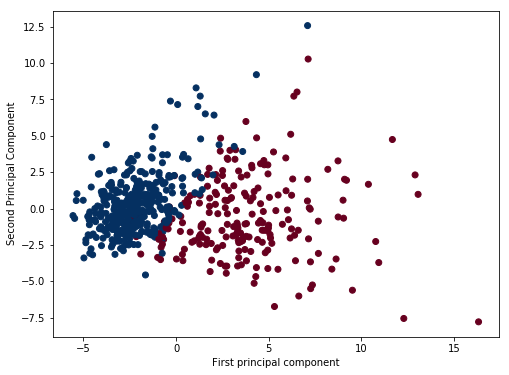

In [19]:
plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='RdBu')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


# they dont relate one to one to a specific feature in your data
# the component correspond to combinations of the original features of the components 

Text(0.5, 0, 'third Principal Component')

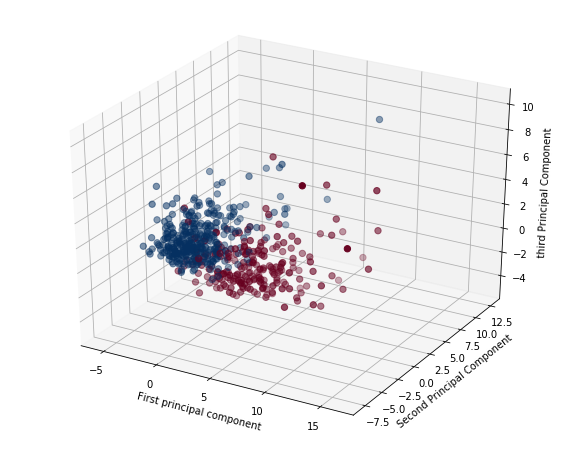

In [20]:
# https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
# https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html
# 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca_3d[:,0],x_pca_3d[:,1],x_pca_3d[:,2],
#           c=cancer['target'],cmap='plasma',s=40,depthshade=True)
           c=cancer['target'],cmap='RdBu',s=40,depthshade=True)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('third Principal Component')



Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [21]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [22]:
pca_3d.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853128,  0.06454988, -0.00931425,  0.02869952, -0.1042922 ,
        -0.07409164,  0.00273396, -0.02556338, -0

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [24]:
df_comp_3d = pd.DataFrame(pca_3d.components_,columns=cancer['feature_names'])
df_comp_3d


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034767,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025563,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


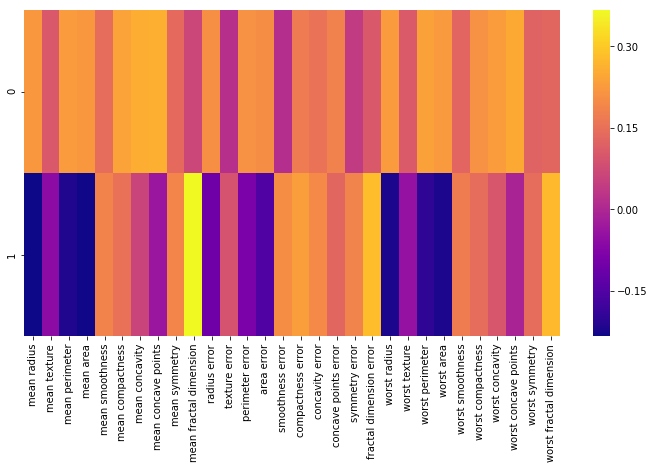

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')
# the higher (yellow) the color, its more correlated to a specific 
# feature in the columns, 
# they are combinations of all these features, and you can see what
# features were specifically important to one of the principle components
# versus the other

# now you can feed X_pca to a classification algorithm, say, 
# logistic regression, instead of doing logistic regression on the
# entire data frame of features, its easily separable by just 
# a straight line, svm might be a good algorithm for this

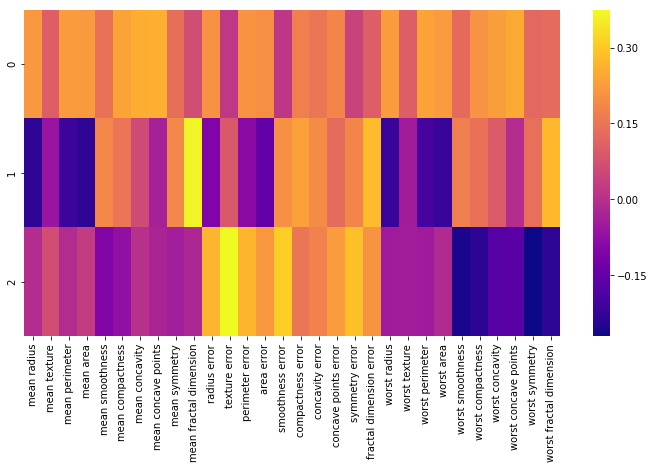

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_3d,cmap='plasma')
# the higher (yellow) the color, its more correlated to a specific 
# feature in the columns, 
# they are combinations of all these features, and you can see what
# features were specifically important to one of the principle components
# versus the other

# now you can feed X_pca to a classification algorithm, say, 
# logistic regression, instead of doing logistic regression on the
# entire data frame of features, its easily separable by just 
# a straight line, svm might be a good algorithm for this

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Great Job!

Need  17 components to retain 99% of variance.


(0, 110)

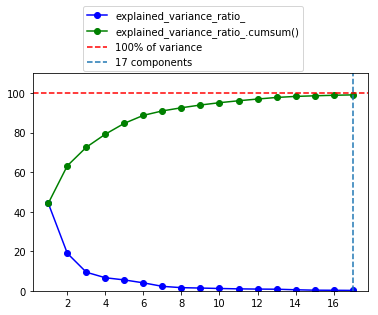

In [27]:
# 99% of variance is retained
# refer to Andrew Ng's note
# 
var_ratio = []
for k in np.arange(1,30):
#    print ('k=',k)
    pca = PCA(n_components=k)
    pca.fit(scaled_data)
    if (pca.explained_variance_ratio_.cumsum()[k-1]) >= 0.99:
        break

print('Need ',k,'components to retain 99% of variance.')
var = pca.explained_variance_ratio_*100
accu_var = pca.explained_variance_ratio_.cumsum()*100

#plt.plot(np.arange(1,18),pca.explained_variance_,'ro-',label='explained_variance_')
plt.plot(np.arange(1,k+1),var,'bo-',label='explained_variance_ratio_')
plt.plot(np.arange(1,k+1),accu_var,'go-',label='explained_variance_ratio_.cumsum()')
plt.axhline(100,linestyle='--', c='r',label='100% of variance')
plt.axvline(k,linestyle='--', label='%i components' %k)
plt.legend(loc=[0.15,1.01])
plt.ylim([0,110])
#
# sklearn.decomposition.PCA:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
#
# Pipelining: chaining a PCA and a logistic regression:
# https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py
#
# https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
# pca.explained_variance_ratio_ :
# returns a vector of the variance explained by each dimension. 
# pca.explained_variance_ratio_.cumsum():
# return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
#


In [28]:
data = np.c_[pca.explained_variance_,pca.explained_variance_ratio_,pca.explained_variance_ratio_.cumsum()]
df2 = pd.DataFrame(data,columns=['explained_variance_','explained_variance_ratio_','explained_variance_ratio_.cumsum()'])

df2

,explained_variance_,explained_variance_ratio_,explained_variance_ratio_.cumsum()
0,13.304991,0.442720,0.442720
1,5.701375,0.189712,0.632432
2,2.822910,0.093932,0.726364
3,1.984128,0.066021,0.792385
4,1.651633,0.054958,0.847343
5,1.209482,0.040245,0.887588
6,0.676409,0.022507,0.910095
7,0.477456,0.015887,0.925983
8,0.417629,0.013896,0.939879
9,0.351311,0.011690,0.951569
